**Лабораторная работа №8. Текстурный анализ и контрастирование**

In [1]:
from PIL import Image, ImageDraw, ImageFont
from PIL.ImageOps import invert
import matplotlib.pyplot as plt
from os import path
import numpy as np
from numpy import log
from numpy import mean
from math import pow, log, log2, floor

Вариант 1

Параметры матрицы:
d=1, phi = {0, 90, 180, 270}

Харалика:
ASM, MPR, ENT, TR

Расчёт признаков Метод преобразования  яркости:
Степенное преобразование

In [2]:
def monochrome(input_array):
  height, width = input_array.shape[:2]
  output_array = np.zeros((height, width), dtype=input_array.dtype)

  for y in range(height):
      for x in range(width):
          output_array[y][x] = np.mean(input_array[y][x])

  #return pim.fromarray(output_array, mode='L')
  new_image = Image.fromarray(output_array)
  new_image.save('new_image_monochrome.png')


def haralik(input_array, d):
    matrix = np.zeros(shape=(256, 256))

    for x in range(d, input_array.shape[0] - d):
        for y in range(d, input_array.shape[1] - d):
            matrix[input_array[x - d, y], input_array[x, y]] += 1
            matrix[input_array[x + d, y], input_array[x, y]] += 1
            matrix[input_array[x, y - d], input_array[x, y]] += 1
            matrix[input_array[x, y + d], input_array[x, y]] += 1

    for x in range(256):
        m = np.array(matrix[x])
        m[np.where(m == 0)] = 1
        matrix[x] = np.log(m)

    matrix = matrix * 256 / np.max(matrix)
    return matrix

def ASM(input_array):
    # Мера однородности изображения
    sum = 0
    for i in range(input_array.shape[0]):
        for j in range(input_array.shape[1]):
            sum += input_array[i, j] ** 2

    return sum

def MPR(input_array):
    # Мера регулярности текстуры
    row_sum = np.sum(input_array, axis=0)
    sum = np.sum(row_sum ** 2)
    return sum

def ENT(input_array):
    # Мера беспорядочности изображения
    har_sum = np.sum(input_array)
    if har_sum == 0:
        return 0

    px = input_array / har_sum
    sum = -np.sum(px * np.log2(px + np.finfo(float).eps))
    return sum

def TR(input_array):
    # Мера грубости текстуры изображения
    row_sum = np.sum(input_array, axis=0)
    col_sum = np.sum(input_array, axis=1)
    row_sum_sq = np.sum(row_sum ** 2)
    col_sum_sq = np.sum(col_sum ** 2)
    sum = row_sum_sq + col_sum_sq
    return sum

In [3]:
def contrast(input_array):
    flat_img = input_array.flatten()
    mn = round(mean(flat_img))

    positiveRange = max(2, max(flat_img) - mn)
    negativeRange = max(2, mn - min(flat_img))

    positiveAlpha = 2 ** 7/ log(positiveRange)
    negativeAlpha = 2 ** 7/ log(negativeRange)

    res_img = np.zeros_like(input_array)

    for i in range(input_array.shape[0]):
        for j in range(input_array.shape[1]):
            f = input_array[i, j] - mn
            if f >= 1:
                res_img[i, j] = mn + positiveAlpha * log(f)
            elif f <= -1:
                res_img[i, j] = mn - negativeAlpha * log(abs(f))
            else:
                res_img[i, j] = mn

    new_image = Image.fromarray(res_img)
    new_image.save('contrast.png')

ASM: 137075228.45351624
ASM (contrasted): 21560717226
MPR: 24036530034.14299
MPR (contrasted): 13559038754390
ENT: 15.25168462704532
ENT (contrasted): 19.855401409094043
TR: 48072837033.281044
TR (contrasted): 34644721629064


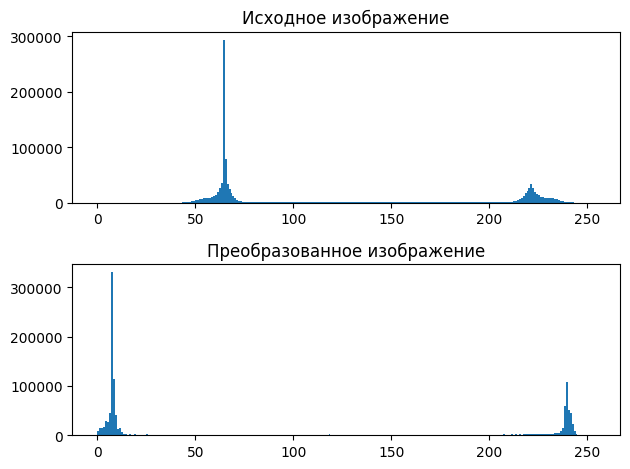

In [5]:
def main():
    input_image = Image.open('oboi.png')
    input_array = np.array(input_image)
    monochrome(input_array)

    input_image = Image.open('new_image_monochrome.png')
    input_array = np.array(input_image)

    figure, axis = plt.subplots(2, 1)
    flattened_array = input_array.flatten()
    axis[0].hist(x=flattened_array, bins=np.arange(0, 255))
    axis[0].title.set_text('Исходное изображение')

    d = 1
    matrix = haralik(input_array, d)
    new_image = Image.fromarray(matrix.astype(np.uint8))
    new_image.save('haralik_1.png')

    contrast(input_array)

    print(f"ASM: {ASM(matrix)}")
    print(f"ASM (contrasted): {ASM(input_array)}")

    print(f"MPR: {MPR(matrix)}")
    print(f"MPR (contrasted): {MPR(input_array)}")

    print(f"ENT: {ENT(matrix)}")
    print(f"ENT (contrasted): {ENT(input_array)}")

    print(f"TR: {TR(matrix)}")
    print(f"TR (contrasted): {TR(input_array)}")

    input_image = Image.open('contrast.png')
    input_array = np.array(input_image)

    flattened_array = input_array.flatten()
    axis[1].hist(x=flattened_array, bins=np.arange(0, 255))
    axis[1].title.set_text('Преобразованное изображение')
    plt.tight_layout()
    plt.savefig('histograms.png')

    d = 1
    matrix = haralik(input_array, d)
    new_image = Image.fromarray(matrix.astype(np.uint8))
    new_image.save('haralik_2.png')

if __name__ == '__main__':
    main()